In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as r
import scipy.io as sio
import math

from sklearn.decomposition import PCA, KernelPCA

%matplotlib inline

## Helper functions

In [48]:
def load_data(path, col_name):
    """
    Load input data from matlab file.
    
    Parameters
    ----------
    path : String
        The relative path of matlab file    
    col_name : String
        Label of the input data within the
        file
    
    Returns
    -------
    Pandas DataFrame
        Contains the input data
    """
    data = sio.loadmat(path)
    data = pd.DataFrame(data['Y'])
    
    return data

def scale_vectors(D, V):
    """
    Scales the eigen vector components to their
    corresponsing eigen values
    
    Parameters
    ----------
    D : 1 x 200 matrix
        The eigenvalues
    V : 200 x 200 matrix
        The eigen vectors
        
    Returns
    -------
    200 x 200 matrix
        The scaled eigen vectors
    """
    return V / np.sqrt(D)

def compute_weight(x, y, v):
    """
    Computes the gaussian weight between
    two points x and y
    
    Parameters
    ----------
    x : 1 x D matrix
        The first point
    y : 1 x D matrix
        The second point
    v : Double
        The variance
    
    Returns
    -------
    Double
        The weight between these two points
        calculated using the gaussian kernel
        function
    """    
    return np.exp((-(np.linalg.norm(x - y) ** 2)) / (2 * v))

## PCA and Kernel-PCA

In [51]:
def pca(X, d):
    """
    Performs Principal Component Analysis on the
    given data to reduce its dimensions.
    
    Parameters
    ----------
    X : D x N matrix
        where N is the number of data points and
        D is the ambient dimension
    d : Integer
        Dimensionality of the low-dimensional
        representation
    
    Returns
    -------
    D x d matrix
        The basis of the low-dimensional subspace
    1 x d matrix
        The mean of the subspace
    d x N matrix
        The low dimensional representation of the
        input data
    """
    X = X.T

    # Do mean normalization
    M_X = np.sum(X, axis = 0)
    M_X = M_X / X.shape[0]
    X = X - M_X

    # Find the correlation matrix
    C = (X.T * X) / X.shape[0]

    # Do eigenvalue decomposition and get hold of 
    # the eigenvalues (D) and eigenvectors (V) of 
    # covariance matrix
    D, V = np.linalg.eig(C)
    
    print(D.argsort())

    # Extract the top-d eigenvectors
    V = V[:, 0:d]
    
    # Represent data in this basis
    Y = X * V
    
    # Calculate the mean of low-dimensional space
    M_Y = np.sum(Y, axis=0) / Y.shape[0]
    
    return V.T, M_Y, Y.T

def kernel_pca(K, d):
    """
    Performs kernel-PCA on the given data for
    dimensionality reduction.
    
    Parameters
    ----------
    K : N x N matrix
        where N is the number of data points
        The kernel matrix
    d : Integer
        Dimensionality of the low dimensional
        representation
    
    Returns
    -------
    d X N matrix
        The low dimensional representation of
        the data
    """
    N = K.shape[0]
    
    # Initialize a N x N matrix of 1's and
    # divide it by N
    ones = np.ones((N, N)) / N
    
    # Initialize a N x N identity matrix
    I = np.identity(N)
    
    # Calculate (I - (1 * 1.T) / N)
    partial = I - ones
    
    # Compute K hat
    K_hat = partial * K * partial
    
    # Do eigenvalue decomposition and get hold of 
    # the eigenvalues (D) and eigenvectors (V) of 
    # covariance matrix
    D, V = np.linalg.eig(K_hat)
    
    # Scale the eigen vectors
    V = scale_vectors(D, V)
    
    # Extract the top-d eigenvectors
    V = V[:, 0:d]
    
    # Represent data in this low-dimensional 
    # basis and return it
    return (K_hat * V).T

[13 14 15 20 21 22 23 28 29 30 31 32 34 35 36 37 39 38 33 27 26 25 24 19 18
 17 16 12 11 10  9  8  7  6  5  4  3  2  1  0]
(2, 200)


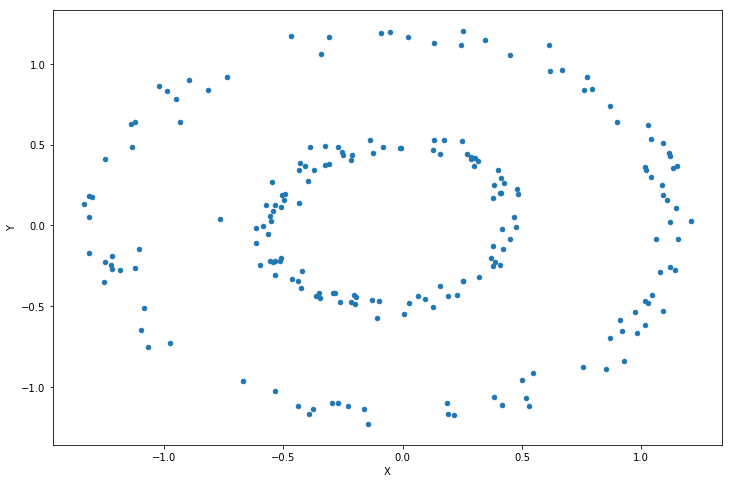

In [18]:
data = load_data("dataset2.mat", 'Y')
X = np.matrix(data.values)
U, mean, Y = pca(X, 2)

print(Y.shape)

u = pd.DataFrame(Y[0:2, :].T, columns=['X', 'Y'])
u.plot(kind="scatter", x='X', y='Y', figsize=(12, 8))

[[ 1.          0.90195056  0.98919244 ...,  0.94451701  0.9188562
   0.92789428]
 [ 0.90195056  1.          0.91306844 ...,  0.93065813  0.94241462
   0.9296293 ]
 [ 0.98919244  0.91306844  1.         ...,  0.95263257  0.92000531
   0.93744831]
 ..., 
 [ 0.94451701  0.93065813  0.95263257 ...,  1.          0.85470976
   0.98988142]
 [ 0.9188562   0.94241462  0.92000531 ...,  0.85470976  1.          0.8511799 ]
 [ 0.92789428  0.9296293   0.93744831 ...,  0.98988142  0.8511799   1.        ]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt


'\nt2 = np.sum(t1, axis=1)\nt2 = t2/t1.shape[1]\nprint(t2)\n\nt1 = t1 - t2\nprint(t1[0:2, :].T)\n'

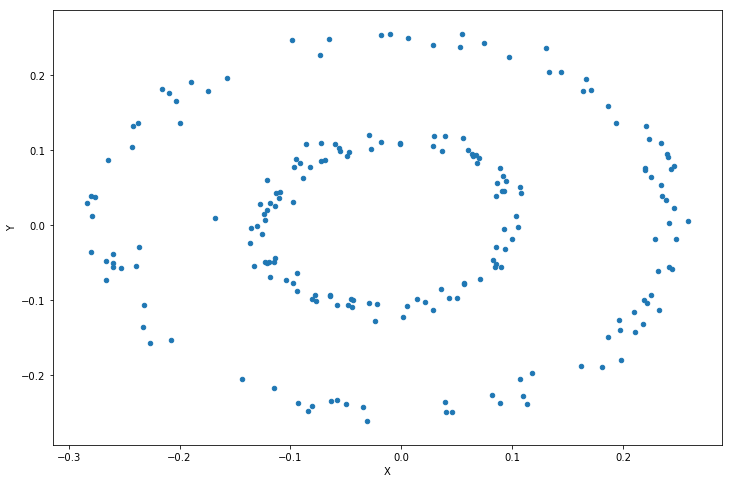

In [52]:
X = np.matrix(data.values)
X = X.T

N = X.shape[0]

W = []
for i in range(N):
    W.append([0 for i in range(N)])

for i in range(N):
    curr_point = X[i]
    for j in range(N):
        adj_point = X[j]
        W[i][j] = compute_weight(curr_point, adj_point, 20)

W = np.matrix(W)
print(W)
Y = kernel_pca(W, 2)

u = pd.DataFrame(Y[0:2, :].T, columns=['X', 'Y'])
u.plot(kind="scatter", x='X', y='Y', figsize=(12, 8))
"""
t2 = np.sum(t1, axis=1)
t2 = t2/t1.shape[1]
print(t2)

t1 = t1 - t2
print(t1[0:2, :].T)
"""

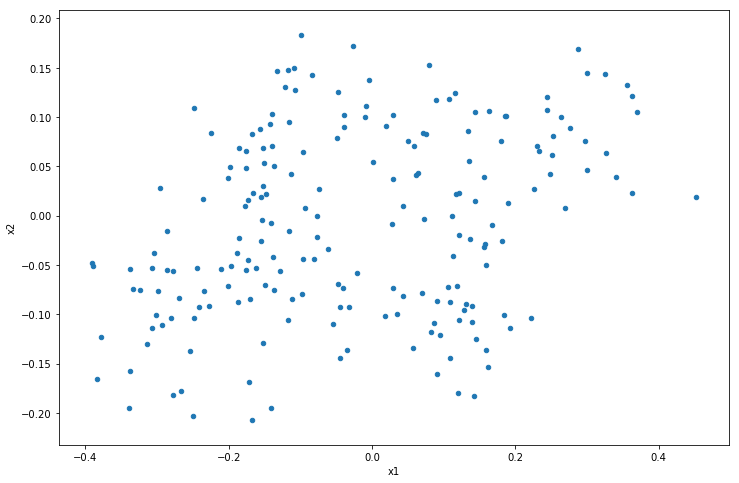

In [19]:
X = np.matrix(data.values)
X = pd.DataFrame(X[0:2, :].T, columns=['x1', 'x2'])
X.plot(kind="scatter", x='x1', y='x2', figsize=(12, 8))

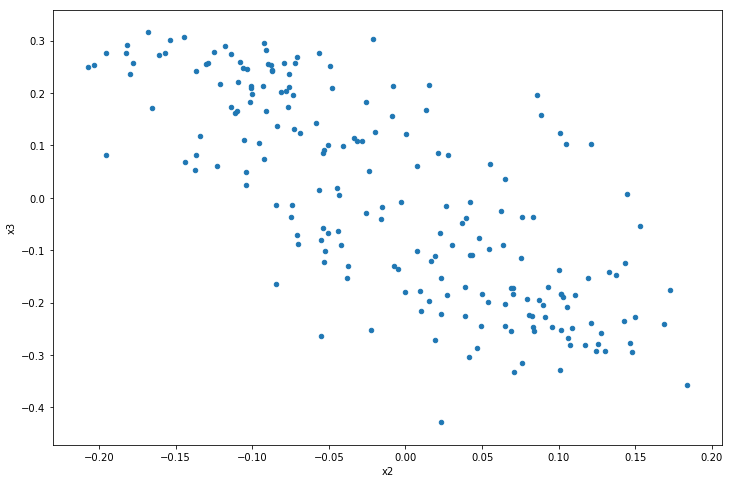

In [20]:
X = np.matrix(data.values)
M = np.matrix([X[1, :].getA1(), X[2, :].getA1()])

X = pd.DataFrame(M.T, columns=['x2', 'x3'])
X.plot(kind="scatter", x='x2', y='x3', figsize=(12, 8))

In [22]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=2)
X_kpca = kpca.fit_transform(X.T)
u = pd.DataFrame(X_kpca, columns=['X', 'Y'])
u.plot(kind="scatter", x='X', y='Y', figsize=(12, 8))

ValueError: Shape of passed values is (200, 200), indices imply (2, 200)